In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [37]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error



In [73]:
df = pd.read_csv('C:/Users/Asrar/Downloads/Formatted_players current elo rating by ATP.csv')

In [74]:
df.head(1)

,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Match,Peak Age,Peak Elo,Gender,Rank
0,Novak Djokovic,34.5,2185.2,2068,2016.3,1942.4,2126.6,2100.8,2063.8,2016 Miami F,28.8,2470.0,Male,1


In [35]:
df.columns


Index(['Player', 'Age', 'Elo', 'HardRaw', 'ClayRaw', 'GrassRaw',
       'hard court elo rating', 'clay-court elo rating',
       'grass-court elo rating', 'Peak Match', 'Peak Age', 'Peak Elo',
       'Gender', 'Rank'],
      dtype='object')

In [75]:
# Assuming your DataFrame is named 'df'
df = df[df['Gender'] == 'Male']


In [76]:
# df['Gender'] == 'Male'           # 'Female'

In [77]:
df.head(1)

,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Match,Peak Age,Peak Elo,Gender,Rank
0,Novak Djokovic,34.5,2185.2,2068,2016.3,1942.4,2126.6,2100.8,2063.8,2016 Miami F,28.8,2470.0,Male,1


In [45]:

df.columns


Index(['Player', 'Age', 'Elo', 'HardRaw', 'ClayRaw', 'GrassRaw',
       'hard court elo rating', 'clay-court elo rating',
       'grass-court elo rating', 'Peak Match', 'Peak Age', 'Peak Elo',
       'Gender', 'Rank'],
      dtype='object')

In [46]:
df.head(1)


,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Match,Peak Age,Peak Elo,Gender,Rank
0,Novak Djokovic,34.5,2185.2,2068,2016.3,1942.4,2126.6,2100.8,2063.8,2016 Miami F,28.8,2470.0,Male,1


In [78]:
df = df.replace(to_replace ="-",
                 value ="0")
df = df.astype({'HardRaw':float,'ClayRaw':float,'GrassRaw':float})
df.columns = ['Player', 'Age', 'Elo', 'HardRaw', 'ClayRaw', 'GrassRaw', 'HardCourt',
       'ClayCourt', 'GrassCourt', 'Peak Match',
       'Peak Age', 'Peak Elo', 'Gender', 'Rank']      
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 386
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      387 non-null    object 
 1   Age         387 non-null    float64
 2   Elo         387 non-null    float64
 3   HardRaw     387 non-null    float64
 4   ClayRaw     387 non-null    float64
 5   GrassRaw    387 non-null    float64
 6   HardCourt   387 non-null    float64
 7   ClayCourt   387 non-null    float64
 8   GrassCourt  387 non-null    float64
 9   Peak Match  387 non-null    object 
 10  Peak Age    387 non-null    float64
 11  Peak Elo    387 non-null    float64
 12  Gender      387 non-null    object 
 13  Rank        387 non-null    int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 45.4+ KB


In [88]:
df.head(10)

,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,HardCourt,ClayCourt,GrassCourt,Peak Match,Peak Age,Peak Elo,Gender,Rank
0,Novak Djokovic,34.5,2185.2,2068.0,2016.3,1942.4,2126.6,2100.8,2063.8,2016 Miami F,28.8,2470.0,Male,1
1,Daniil Medvedev,25.9,2166.2,2095.3,1714.1,1723.4,2130.7,1940.1,1944.8,2022 Atp Cup RR,25.9,2175.1,Male,2
2,Alexander Zverev,24.7,2141.3,2056.7,1999.1,1671.4,2099.0,2070.2,1906.4,2022 Atp Cup RR,24.7,2157.9,Male,3
3,Roger Federer,39.9,2043.0,1936.7,1749.6,1813.4,1989.8,1896.3,1928.2,2007 Dubai F,25.6,2382.0,Male,4
4,Carlos Alcaraz,18.5,2029.5,1906.3,1834.4,1441.4,1967.9,1932.0,1735.5,2021 NextGen Finals F,18.5,2029.5,Male,5
5,Stefanos Tsitsipas,23.4,2023.0,1882.0,2005.5,1543.4,1952.5,2014.3,1783.2,2021 Roland Garros SF,22.8,2132.6,Male,6
6,Casper Ruud,23.0,2010.2,1846.0,1951.2,1465.9,1928.1,1980.7,1738.0,2021 Tour Finals RR,22.9,2032.0,Male,7
7,Rafael Nadal,35.6,2007.5,1820.0,1951.2,1500.0,1913.7,1979.3,1753.7,2009 Madrid SF,22.9,2370.0,Male,8
8,Jannik Sinner,20.4,2006.1,1931.2,1807.0,1312.8,1968.7,1906.6,1659.5,2021 Barcelona QF,19.7,2025.3,Male,9
9,Dominic Thiem,27.7,2002.1,1934.8,1936.2,1618.3,1968.4,1969.1,1810.2,2016 Halle R16,22.8,2123.2,Male,10


In [79]:
# Split the data into training and testing sets
# X = df.drop('Rank','Player','Peak Match' axis=1)
X = df.drop(['Rank', 'Player', 'Peak Match','Gender'], axis=1)
y = df['Rank']


In [80]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [81]:
# Apply Standardization to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
X.head(1)

,Age,Elo,HardRaw,ClayRaw,GrassRaw,HardCourt,ClayCourt,GrassCourt,Peak Age,Peak Elo
0,34.5,2185.2,2068.0,2016.3,1942.4,2126.6,2100.8,2063.8,28.8,2470.0


In [83]:
X_scaled[0]

array([1.47797961, 3.24028792, 2.41906505, 2.47985046, 1.32904488,
       3.26073888, 3.24417123, 4.06833526, 1.32757933, 3.89058552])

In [25]:
y[0]

1

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Standardize the features (scaling)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Create a Gradient Boosting Regressor model


In [85]:
gbr = GradientBoostingRegressor()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Gradient Boosting Regressor model with the best hyperparameters
best_gbr = GradientBoostingRegressor(**best_params)
best_gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_gbr.predict(X_test)

# Calculate the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}
Mean Squared Error: 1.3867526988267591


In [70]:
y_pred = best_gbr.predict(scaled_data)  ## ACTUAL 5 PREDICT : 4.96933138
y_pred

array([4.96933138])

In [ ]:
y_pred = best_gbr.predict(scaled_data)  ## ACTUAL  2 PREDICT :2.2729545
y_pred


In [63]:
gbr = GradientBoostingRegressor()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Gradient Boosting Regressor model with the best hyperparameters
best_gbr = GradientBoostingRegressor(**best_params)
best_gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_gbr.predict(X_test)

# Calculate the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}
Mean Squared Error: 1.4207860547985856


In [71]:
y_pred = best_gbr.predict(scaled_data)
y_pred

array([4.96933138])

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load your data into a DataFrame (replace 'data.csv' with your data file)
#df = pd.read_csv('data.csv')



# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



# Create an SVR model
svr = SVR()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': [0.1, 0.2, 0.3],
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the SVR model with the best hyperparameters
best_svr = SVR(**best_params)
best_svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svr.predict(X_test)

# Calculate the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Best Hyperparameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
Mean Squared Error: 1396.0438294808932


In [72]:
y_pred = best_svr.predict(scaled_data)
y_pred

array([-95.48764961])

In [87]:
X_scaled[:6]

array([[ 1.47797961,  3.24028792,  2.41906505,  2.47985046,  1.32904488,
         3.26073888,  3.24417123,  4.06833526,  1.32757933,  3.89058552],
       [-0.32293265,  3.13871725,  2.52780229,  1.12055125,  0.95578462,
         3.28306314,  2.33599195,  3.19678921,  0.45119425,  2.358786  ],
       [-0.57422273,  3.00560622,  2.3740566 ,  2.40248465,  0.86715661,
         3.1104585 ,  3.07123852,  2.91555082,  0.08855214,  2.26944402],
       [ 2.60878499,  2.48011168,  1.89609075,  1.28023067,  1.10917925,
         2.51587093,  2.08846083,  3.07521219,  0.36053372,  3.43348698],
       [-1.87255482,  2.40794305,  1.77500607,  1.66166208,  0.47514812,
         2.39662672,  2.29021565,  1.6638935 , -1.78509873,  1.6024957 ],
       [-0.84645365,  2.37319519,  1.67821798,  2.43127193,  0.64899536,
         2.31277463,  2.75532551,  2.01324432, -0.48563119,  2.13802819]])

In [45]:
y[33:34]

33    34
Name: Rank, dtype: int64

In [69]:
import pandas as pd

# Create a DataFrame from the scaled data
scaled_data = pd.DataFrame([[-0.84645365,  2.37319519,  1.67821798,  2.43127193,  0.64899536,
         2.31277463,  2.75532551,  2.01324432, -0.48563119,  2.13802819 ]])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions for the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Now, you can use the trained linear regression model to predict the 'Rank' for new data.
# For example, to predict the 'Rank' for a new player, you can use model.predict(new_data).
# Replace new_data with the data for the new player.


Mean Squared Error: 919.0010302365298


In [30]:
y_pred = model.predict(X_test)
# y_pred

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions for the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Now, you can use the trained model to predict the 'Rank' for new data.
# For example, to predict the 'Rank' for a new player, you can use model.predict(new_data).
# Replace new_data with the data for the new player.



Mean Squared Error: 2.6586192307692325


In [67]:
y_pred = model.predict(scaled_data)
y_pred

array([3.57])

In [18]:
# y_pred

In [127]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error



In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
model = RandomForestRegressor(random_state=42)


In [29]:
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 10, 20, 30]
#}

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],    # Number of trees in the forest
    'max_depth': [None, 10, 20],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

In [30]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [31]:
# Get feature importances
# feature_importances =grid_search.feature_importances_

In [31]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


In [32]:
y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Best Mean Squared Error: {mse}")


Best Mean Squared Error: 67.58401026185417


In [34]:
y_pred = best_estimator.predict(test_data)
y_pred

C:\Users\Asrar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([4.61042857])

In [35]:
cv_scores = cross_val_score(best_estimator,X_scaled, y, cv=5, scoring='neg_mean_squared_error')
average_mse = -cv_scores.mean()
print(f"Cross-Validated Mean Squared Error: {average_mse}")


Cross-Validated Mean Squared Error: 1116.5014960327221


In [36]:
y_pred = best_estimator.predict(test_data)
y_pred

C:\Users\Asrar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([4.61042857])

In [65]:
from sklearn.metrics import mean_absolute_error




In [66]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")



Root Mean Squared Error: 1.5251138012243328


In [110]:
#predicted_rank = model.predict(X_test)

In [21]:
test_data = pd.DataFrame({'Age': [30.5], 'Elo': [2185.2], 'HardRaw': [2068.0],
                                'ClayRaw': [2016.3], 'GrassRaw': [1942.4],
                                'HardCourt': [2126.6],
                                'ClayCourt': [2100.8],
                                'GrassCourt': [2063.8],
                                'Peak Age': [28.8], 'Peak Elo': [2470.0]})

  ## 'Peak Age': [28.8], 'Peak Elo': [2470.0]


In [115]:
df.head(2)

,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,HardCourt,ClayCourt,GrassCourt,Peak Match,Peak Age,Peak Elo,Gender,Rank
0,Novak Djokovic,34.5,2185.2,2068.0,2016.3,1942.4,2126.6,2100.8,2063.8,2016 Miami F,28.8,2470.0,Male,1
1,Daniil Medvedev,25.9,2166.2,2095.3,1714.1,1723.4,2130.7,1940.1,1944.8,2022 Atp Cup RR,25.9,2175.1,Male,2


In [84]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                 Age       Elo   HardRaw   ClayRaw  GrassRaw  HardCourt  \
Age         1.000000  0.087236  0.175811  0.152076  0.417287   0.132399   
Elo         0.087236  1.000000  0.745223  0.720425  0.484839   0.974719   
HardRaw     0.175811  0.745223  1.000000  0.445581  0.534371   0.813358   
ClayRaw     0.152076  0.720425  0.445581  1.000000  0.379136   0.649627   
GrassRaw    0.417287  0.484839  0.534371  0.379136  1.000000   0.527114   
HardCourt   0.132399  0.974719  0.813358  0.649627  0.527114   1.000000   
ClayCourt   0.110247  0.959713  0.664605  0.832931  0.460841   0.904944   
GrassCourt  0.122136  0.932728  0.713979  0.648688  0.485638   0.927029   
Peak Age    0.715910  0.180307  0.168094  0.196879  0.286420   0.190792   
Peak Elo    0.395080  0.853814  0.702317  0.676403  0.609875   0.865075   
Rank       -0.106063 -0.973760 -0.723175 -0.712674 -0.494372  -0.943475   

            ClayCourt  GrassCourt  Peak Age  Peak Elo      Rank  
Age          0.110247    0.122136

C:\Users\Asrar\AppData\Local\Temp/ipykernel_7672/2448198415.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

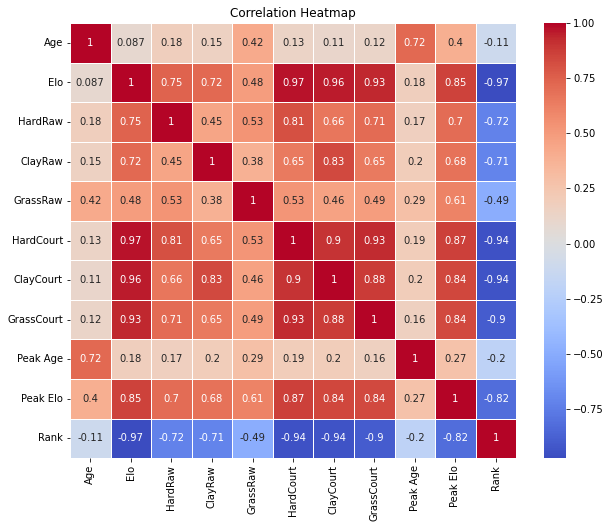

In [32]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# A lower MSE value indicates better model performance, 
# as it means that the predicted values are closer to the actual values on average. 
# Conversely, a higher MSE indicates that 
# the model's predictions are farther from the actual values on average.

In [20]:
df2 = df[['Rank','Player','Age','Elo', 'HardRaw', 'ClayRaw', 'GrassRaw', 'HardCourt',
       'ClayCourt', 'GrassCourt', 'Peak Elo',
       'Gender']]
df2.head(2)

,Rank,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,HardCourt,ClayCourt,GrassCourt,Peak Elo,Gender
0,1,Novak Djokovic,34.5,2185.2,2068.0,2016.3,1942.4,2126.6,2100.8,2063.8,2470.0,Male
1,2,Daniil Medvedev,25.9,2166.2,2095.3,1714.1,1723.4,2130.7,1940.1,1944.8,2175.1,Male


In [23]:
Player = 'PlayerTwo'
a = [[0, 'PlayerTwo',34,2456.0, 2134.0, 2403.0, 2104.0, 2081.0, 2000.0, 2301.0, 2459.0, 'Female']]
df2 = df2.append(pd.DataFrame(a, columns=['Rank','Player','Age', 'Elo', 'HardRaw', 'ClayRaw', 'GrassRaw', 'HardCourt',
       'ClayCourt', 'GrassCourt', 'Peak Elo',
       'Gender']),ignore_index=True)
df2.head(2)

C:\Users\Asrar\AppData\Local\Temp/ipykernel_16736/2687590292.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(pd.DataFrame(a, columns=['Rank','Player','Age', 'Elo', 'HardRaw', 'ClayRaw', 'GrassRaw', 'HardCourt',


,Rank,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,HardCourt,ClayCourt,GrassCourt,Peak Elo,Gender
0,1,Novak Djokovic,34.5,2185.2,2068.0,2016.3,1942.4,2126.6,2100.8,2063.8,2470.0,Male
1,2,Daniil Medvedev,25.9,2166.2,2095.3,1714.1,1723.4,2130.7,1940.1,1944.8,2175.1,Male


In [ ]:
Player = 'PlayerTwo'
a = [[0, 'PlayerTwo', 2456.0, 2134.0, 2403.0, 2104.0, 2081.0, 2000.0, 2301.0, 2459.0, 'Female']]
df2 = df2.append(pd.DataFrame(a, columns=['Rank','Player', 'Elo', 'HardRaw', 'ClayRaw', 'GrassRaw', 'HardCourt',
       'ClayCourt', 'GrassCourt', 'Peak Elo',
       'Gender']),ignore_index=True)

In [ ]:
Player = 'PlayerThree'
a = [[0, 'PlayerThree', 2068.0, 2134.0, 2403.0, 2104.0, 2081.0, 2000.0, 2301.0, 2459.0, 'Female']]
df2 = df2.append(pd.DataFrame(a, columns=['Rank','Player', 'Elo', 'HardRaw', 'ClayRaw', 'GrassRaw', 'HardCourt',
       'ClayCourt', 'GrassCourt', 'Peak Elo',
       'Gender']),ignore_index=True)

In [24]:
df2 = df2.sort_values(by=['Elo'],ascending=False).reset_index(drop=True)
#df2.sort_values(by=['Peak Elo'],inplace=True,ascending=False)

df2.index.rename('new_index', inplace=True)
df2.head(2)

,Rank,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,HardCourt,ClayCourt,GrassCourt,Peak Elo,Gender
new_index,,,,,,,,,,,,
0,0,PlayerTwo,34.0,2456.0,2134.0,2403.0,2104.0,2081.0,2000.0,2301.0,2459.0,Female
1,0,PlayerTwo,NaN,2456.0,2134.0,2403.0,2104.0,2081.0,2000.0,2301.0,2459.0,Female


In [25]:
df2['Rank'] =df2['Rank'] + 1
df2[df2.apply(lambda x: x.Player==Player, axis=1)][['Player', 'Rank']]

,Player,Rank
new_index,,
0,PlayerTwo,1
1,PlayerTwo,1


In [19]:
df2 = df2.sort_values(by=['Rank'],ascending=True).reset_index(drop=True)
#df2.sort_values(by=['Peak Elo'],inplace=True,ascending=False)

df2.index.rename('new_index', inplace=True)
df2.head(6)

,Rank,Player,Elo,HardRaw,ClayRaw,GrassRaw,HardCourt,ClayCourt,GrassCourt,Peak Elo,Gender
new_index,,,,,,,,,,,
0,1,PlayerTwo,2456.0,2134.0,2403.0,2104.0,2081.0,2000.0,2301.0,2459.0,Female
1,1,PlayerTwo,2456.0,2134.0,2403.0,2104.0,2081.0,2000.0,2301.0,2459.0,Female
2,2,Novak Djokovic,2185.2,2068.0,2016.3,1942.4,2126.6,2100.8,2063.8,2470.0,Male
3,2,Ashleigh Barty,2132.0,1994.1,1929.0,1817.9,2063.0,2030.5,1975.0,2148.9,Female
4,3,Daniil Medvedev,2166.2,2095.3,1714.1,1723.4,2130.7,1940.1,1944.8,2175.1,Male
5,3,Naomi Osaka,2038.9,1986.8,1661.1,1546.2,2012.9,1850.0,1792.5,2114.3,Female


In [132]:
X = df[["Age","Elo","HardRaw","ClayRaw","GrassRaw","HardCourt",
        "ClayCourt","GrassCourt","Peak Age","Peak Elo"]]
y = df[["Rank"]]



In [99]:
#X = data[['Age', 'Elo', 'HardRaw', 'ClayRaw', 'GrassRaw', 'hard court elo rating',
         # 'clay-court elo rating', 'grass-court elo rating', 'Peak Age', 'Peak Elo']]


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [135]:
# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [137]:
y_pred = gb_model.predict(test_data)
y_pred

array([237.15910566, 375.93040306, 193.28021746,  82.65736766,
       223.95297872, 166.96991298, 111.36733163, 210.80907549,
       163.73274098, 234.94472957, 362.10228465, 247.71363611,
       368.77980763,  76.15834197, 325.59918989, 317.07674621,
        17.18040355,  66.51763227, 173.19338249,   8.12698571,
        19.92726232, 131.84365674, 342.68016091, 336.31201273,
       104.9527668 , 350.81386965, 283.00757185, 373.963855  ,
       287.76189315,  61.28665141,  80.43006986, 275.39778173,
       131.78700258, 243.62417258, 150.82071222, 111.15637038,
        18.05506841, 318.61915465,  24.69716771, 259.30023975,
       339.74452399, 141.76282334, 240.01694987, 235.39097212,
       370.4235227 , 178.14800889, 375.1579616 , 382.75190358,
       141.34588203, 231.51179005, 170.06203027, 120.89518868,
       261.66080397, 194.85010411, 363.94176793, 146.42209353,
       297.55411369,  37.15242105, 281.76627267, 148.33048498,
       381.85199362, 303.34863865,  59.77475033, 111.91

In [130]:
# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 200, random_state=46)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=46)

In [139]:
# Make predictions on the test set
y_pred = gb_model.predict(new_player_data)
y_pred

C:\Users\Asrar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


array([2.87270133])

In [72]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [92]:

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of boosting stages to be used
    'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5]               # Maximum depth of the individual trees
}




In [93]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data using grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert negative MSE to positive

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Mean Squared Error: {best_score}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best Cross-Validated Mean Squared Error: 2.3527816154833245


In [99]:
# Make predictions on the test set
# Assuming you have a new dataset X_new that you want to make predictions on
#y_new_pred = gb_model.predict(X_test)
#y_new_pred

# The variable y_new_pred now contains the predicted values for the new data.


In [100]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the Gradient Boosting model with the best parameters
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth: 4, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Now that the model is trained, you can make predictions on new data
y_new_pred = gb_model.predict(X_test)


SyntaxError: invalid syntax (Temp/ipykernel_17468/3301928030.py, line 4)

In [98]:
y_new_pred = gb_model.predict(test_data)
y_new_pred

array([3.1620455])

In [136]:
# Calculate the Root Mean Squared Error (RMSE) to evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.4231265879669737


In [83]:
import pandas as pd

# Create a DataFrame for the test data
test_data = pd.DataFrame({'Age': [30.5], 'Elo': [2185.2], 'HardRaw': [2068.0],
                                'ClayRaw': [2016.3], 'GrassRaw': [1942.4],
                                'HardCourt': [2126.6],
                                'ClayCourt': [2100.8],
                                'GrassCourt': [2063.8],
                                'Peak Age': [28.8], 'Peak Elo': [2470.0]})

In [138]:
# Use the trained model to predict the rank for the new data
predicted_rank = gb_model.predict(test_data)
print(f"Predicted Rank: {predicted_rank[0]}")


Predicted Rank: 3.1620455034006065


In [111]:
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

C:\Users\Asrar\AppData\Local\Temp/ipykernel_16668/1003983043.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [112]:
# Use the trained model to make predictions on the test set
y_pred = rf_model.predict(X_test)


In [114]:
y_pred

array([315.36, 150.75,  91.54, 265.33, 210.21, 297.21,  80.71,  99.62,
       282.8 ,  31.51,  74.95,  84.38, 226.34,  41.76, 359.74, 256.44,
       329.92,  72.92, 248.96, 338.7 ,  54.69, 173.28, 232.83,   8.09,
       210.84,  15.5 , 322.76, 158.07, 283.48,   3.69, 379.07,  77.37,
        25.42, 122.88, 126.17, 341.1 ,  56.97, 120.16, 329.41, 330.89,
        42.92,  48.41, 383.26, 302.18, 119.55, 111.78, 360.08,  53.47,
        22.83,  30.85, 222.21, 153.41,  92.97, 250.84,  30.25, 333.63,
       201.44, 292.71, 253.38, 268.2 , 311.63, 382.63, 143.06, 182.88,
         6.52,  46.52, 110.41, 358.34,  96.54, 356.5 ,  81.2 , 111.16,
         6.58,  18.26, 137.19, 273.86, 349.05,  64.68])

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 1.3787179487179504
Mean Squared Error: 2.648484615384621
R-squared: 0.9998191912231592


In [100]:
# Split the dataset into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using metrics (MSE and R-squared)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")


Mean Squared Error: 919.0010302365291
R-squared: 0.9372609335816715


In [120]:
# Now, you can make rank predictions for new player data
import pandas as pd

# Create a DataFrame for the test data
test_data = pd.DataFrame({'Age': [30.5], 'Elo': [2185.2], 'HardRaw': [2068.0],
                                'ClayRaw': [2016.3], 'GrassRaw': [1942.4],
                                'HardCourt': [2126.6],
                                'ClayCourt': [2100.8],
                                'GrassCourt': [2063.8],
                                'Peak Age': [28.8], 'Peak Elo': [2470.0]})


In [121]:
# Use the trained model to predict the rank for the test data
predicted_rank = rf_model.predict(test_data)

print(f"Predicted Rank: {predicted_rank[0]}")


Predicted Rank: 3.69


In [102]:
predicted_rank = model.predict(new_player_data)
print(f"Predicted Rank: {predicted_rank[0]}")

Predicted Rank: [-154.81800492]


In [63]:
model = LinearRegression()

In [64]:
# Fit the model to the training data
model.fit(X, y)

LinearRegression()

In [ ]:
X = df[["Age","Elo","HardRaw","ClayRaw","GrassRaw","HardCourt",
        "ClayCourt","GrassCourt","Peak Age","Peak Elo"]]

In [138]:
# Now, you can make rank predictions for new player data
new_player_data = pd.DataFrame({'Age': [30.5], 'Elo': [2185.2], 'HardRaw': [2068.0],
                                'ClayRaw': [2016.3], 'GrassRaw': [1942.4],
                                'HardCourt': [2126.6],
                                'ClayCourt': [2100.8],
                                'GrassCourt': [2063.8],
                                'Peak Age': [28.8], 'Peak Elo': [2470.0]})


In [78]:
# Predict the rank for the new player data
predicted_rank = model.predict(new_player_data)

In [79]:
df.head(1)

,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,HardCourt,ClayCourt,GrassCourt,Peak Match,Peak Age,Peak Elo,Gender,Rank
0,Novak Djokovic,34.5,2185.2,2068.0,2016.3,1942.4,2126.6,2100.8,2063.8,2016 Miami F,28.8,2470.0,Male,1


In [80]:
# Print the predicted rank
print(f"Predicted Rank: {predicted_rank[0]}")

Predicted Rank: [-134.0194197]


In [ ]:
x_train = df.drop(['HOUSING_VALUE'],axis=1)
y_train = df['HOUSING_VALUE']

In [7]:
X = data.drop(['Rank'],axis=1)

# Define the target variable (dependent variable), which is 'Rank'
y = data['Rank']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X = data[['Age', 'Elo', 'HardRaw', 'ClayRaw', 'GrassRaw', 'hard court elo rating',
          'clay-court elo rating', 'grass-court elo rating', 'Peak Age', 'Peak Elo']]


KeyError: "['clay-court elo rating', 'grass-court elo rating', 'Peak Age', 'Peak Elo'] not in index"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (replace 'data.csv' with the actual path to your dataset)
data = pd.read_csv('data.csv')

# Select relevant features (independent variables) for the prediction
# Here, we are using 'Age', 'Elo', 'HardRaw', 'ClayRaw', 'GrassRaw', 'hard court elo rating',
# 'clay-court elo rating', 'grass-court elo rating', 'Peak Age', and 'Peak Elo' as features.
X = data[['Age', 'Elo', 'HardRaw', 'ClayRaw', 'GrassRaw', 'hard court elo rating',
          'clay-court elo rating', 'grass-court elo rating', 'Peak Age', 'Peak Elo']]

# Define the target variable (dependent variable), which is 'Rank'
y = data['Rank']

# Split the dataset into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using metrics (MSE and R-squared)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Now, you can use the trained model to make rank predictions for new data
# For example, you can predict the rank for a new player's data as follows:
new_player_data = pd.DataFrame({'Age': [30.0], 'Elo': [2100.0], 'HardRaw': [2000.0],
                                'ClayRaw': [1900.0], 'GrassRaw': [1800.0],
                                'hard court elo rating': [2080.0],
                                'clay-court elo rating': [1950.0],
                                'grass-court elo rating': [1850.0],
                                'Peak Age': [28.0], 'Peak Elo': [2200.0]})
predicted_rank = model.predict(new_player_data)
print(f"Predicted Rank: {predicted_rank[0]}")


In [97]:
new_player_data = pd.DataFrame({'Age': [30.0], 'Elo': [2100.0], 'HardRaw': [2000.0],
                                'ClayRaw': [1900.0], 'GrassRaw': [1800.0],
                                'hard court elo rating': [2080.0],
                                'clay-court elo rating': [1950.0],
                                'grass-court elo rating': [1850.0],
                                'Peak Age': [28.0], 'Peak Elo': [2200.0],'Gender':[1],'Rank':[1] })

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your data and preprocess it (if needed)
# Replace this with your data loading and preprocessing code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model with the best parameters
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Now you can use the model to predict the rank for new data
# For example, to predict rank for a new player, use model.predict(new_data).


Mean Squared Error: 919.0010302365291
Mean Absolute Error: 21.37129285093333
R-squared: 0.9372609335816715


In [160]:
y_pred = model.predict(test_data)
y_pred

array([-154.81800492])